In [3]:
from Kan_NN import Neural_Kan
from kan import *


In [3]:
import torch
from torch import nn

In [3]:
### define the objective function
def f(X):
    X_1 = X**(0.5)
    X_2 = torch.sum(X_1, dim=1, keepdim=True)
    X_3 = X_2**(.4521)
    X_4 = torch.sum(X_3, dim=1, keepdim=True)
    return X_4


In [5]:
def f(x):
    # Fixed exponents between 0 and 1
    alpha = 0.5
    beta = 0.7
    gamma = 0.3
    delta = 0.8
    epsilon = 0.6
    omega = 0.4
    
    # First term: (x^alpha + (1 - x)^beta)^gamma
    term1 = 10*torch.sum(x ** alpha, dim = 1)
    term2 = 2*torch.sum((1.0001 - x) ** beta, dim = 1)
    # Second term: (sin(2πx)^delta)^epsilon
    term3 = torch.abs(torch.sin(2 * torch.pi * torch.sum(x**delta, dim = 1)))
    term4= torch.sum(x**0.3, dim = 1)
    result = (torch.abs((torch.sin(2 * torch.pi * (term1 ** .5)) + torch.cos(20 * torch.pi * (term2 ** .4))))**omega + torch.abs((term3**.67 + term4**0.1)))
    return torch.reshape(result, [result.shape[0], 1])
    #term3 = torch.abs(torch.cos(20 * torch.pi * x)) ** .345
    #term3 = term3 ** .2345
    #term3 = 0.5*torch.sum(term3, dim = 1)

    #result = ((term1 + term2) ** omega + term3) ** .9
    #return result
# Example usage:
n = 10  # length of input tensor
x = torch.rand(1000,n, dtype=torch.float32)  # Example input tensor of size n


result = f(x)
print(result.shape, torch.max(result), torch.min(result))


torch.Size([1000, 1]) tensor(3.5324) tensor(1.5546)


In [6]:
in_dim = 2

In [7]:
model_kan = KAN(width=[in_dim,4,2,1], grid=3, k=3, seed=2)
dataset = create_dataset(f, n_var=in_dim, ranges = [0,1])
model_kan.fit(dataset, opt="Adam", steps=200)
model_kan = model_kan.refine(20)
model_kan.fit(dataset, opt="Adam", steps=200)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.77e-01 | test_loss: 3.72e-01 | reg: 2.00e+02 | : 100%|█| 200/200 [00:17<00:00, 11.63


saving model version 0.1
saving model version 0.2


| train_loss: 3.49e-01 | test_loss: 4.43e-01 | reg: 2.69e+02 | : 100%|█| 200/200 [00:14<00:00, 13.94


saving model version 0.3


{'train_loss': [array(0.38247734, dtype=float32),
  array(28.245173, dtype=float32),
  array(5.0525923, dtype=float32),
  array(2.7938032, dtype=float32),
  array(2.6427329, dtype=float32),
  array(2.6427329, dtype=float32),
  array(1.1964312, dtype=float32),
  array(2.0394719, dtype=float32),
  array(2.6062427, dtype=float32),
  array(2.5633876, dtype=float32),
  array(2.6427143, dtype=float32),
  array(1.1094286, dtype=float32),
  array(2.5401, dtype=float32),
  array(1.6698682, dtype=float32),
  array(2.0904715, dtype=float32),
  array(2.4131632, dtype=float32),
  array(1.8189468, dtype=float32),
  array(1.7536424, dtype=float32),
  array(1.7174212, dtype=float32),
  array(1.8045586, dtype=float32),
  array(1.346865, dtype=float32),
  array(1.4401426, dtype=float32),
  array(1.2416173, dtype=float32),
  array(1.0391248, dtype=float32),
  array(0.8500662, dtype=float32),
  array(0.88217497, dtype=float32),
  array(0.93505377, dtype=float32),
  array(1.1135118, dtype=float32),
  array

In [11]:
model_kan = model_kan.refine(40)
model_kan.fit(dataset, opt="Adam", steps=500)

saving model version 0.6


| train_loss: 1.53e-01 | test_loss: 5.13e-01 | reg: 7.26e+03 | : 100%|█| 500/500 [00:55<00:00,  9.07


saving model version 0.7


{'train_loss': [array(0.8464201, dtype=float32),
  array(11.798604, dtype=float32),
  array(1.6312318, dtype=float32),
  array(2.6680717, dtype=float32),
  array(2.9519596, dtype=float32),
  array(4.28492, dtype=float32),
  array(1.8781296, dtype=float32),
  array(1.3853589, dtype=float32),
  array(2.2770412, dtype=float32),
  array(1.3501179, dtype=float32),
  array(1.2978276, dtype=float32),
  array(1.6191354, dtype=float32),
  array(1.9569095, dtype=float32),
  array(2.1449184, dtype=float32),
  array(2.140787, dtype=float32),
  array(1.8850867, dtype=float32),
  array(1.4283118, dtype=float32),
  array(1.2953305, dtype=float32),
  array(1.2625834, dtype=float32),
  array(1.0552663, dtype=float32),
  array(0.9137374, dtype=float32),
  array(0.77941906, dtype=float32),
  array(1.0727677, dtype=float32),
  array(0.60362417, dtype=float32),
  array(0.5768433, dtype=float32),
  array(0.56600183, dtype=float32),
  array(0.5335797, dtype=float32),
  array(0.53073037, dtype=float32),
  arr

In [10]:
model = Neural_Kan(shape = [in_dim,4,2,1], h = [64])
dataloader = model.get_dataloader(f, in_dim=in_dim, num_samples=4000, batch_size=8)
print(dataloader)
dataloader_test = model.get_dataloader(f, in_dim=in_dim, num_samples=10, batch_size=1)
model.fit(dataloader = dataloader,dataloader_test = dataloader_test, epochs=200, lr=1e-3)


10 4
Sequential(
  (0): Linear(in_features=10, out_features=640, bias=True)
  (1): ReLU()
)
4 2
Sequential(
  (0): Linear(in_features=4, out_features=256, bias=True)
  (1): ReLU()
)
2 1
Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
)


NameError: name 'f' is not defined

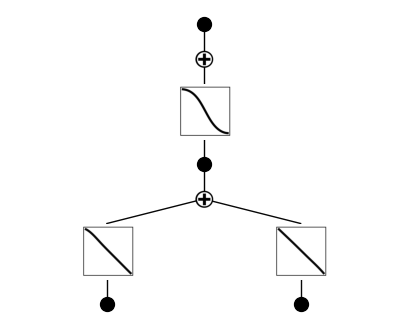

In [26]:
model_kan.plot()

In [30]:
model_kan.auto_symbolic()
sf = model_kan.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

fixing (0,0,0) with x, r2=0.9995760917663574, c=1
fixing (0,1,0) with x, r2=0.9999150633811951, c=1
fixing (1,0,0) with x, r2=0.9758377075195312, c=1
saving model version 0.2


962*x_1/125 + 307*x_2/40 + 4/47

In [28]:
model_kan.suggest_symbolic(0,0,0)

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0        x    0.999576 -11.170322           1                1   -1.434064
1      cos    0.999753 -11.926939           2                2   -0.785388
2      sin    0.999753 -11.926604           2                2   -0.785321
3      x^2    0.999590 -11.215821           2                2   -0.643164
4      exp    0.999589 -11.215207           2                2   -0.643041


('x',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  1,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9995760917663574,
 1)

In [3]:
import matplotlib
matplotlib.use('QtAgg')  # Force use of TkAgg backend
import matplotlib.pyplot as plt


In [11]:
def f(x):
# Fixed exponents between 0 and 1
    alpha = 0.5
    beta = 0.7
    gamma = 0.3
    delta = 0.8
    epsilon = 0.6
    omega = 0.4
    # First term: (x^alpha + (1 - x)^beta)^gamma
    term1 = 10*torch.sum(x ** alpha, dim = 1)
    term2 = 2*torch.sum((1.0001 - x) ** beta, dim = 1)
    # Second term: (sin(2πx)^delta)^epsilon
    term3 = torch.abs(torch.sin(2 * torch.pi * torch.sum(x**delta, dim = 1)))
    term4= torch.sum(x**0.3, dim = 1)
    result = (torch.abs((torch.sin(2 * torch.pi * (term1 ** .5)) + torch.cos(20 * torch.pi * (term2 ** .4))))**omega + torch.abs((term3**.67 + term4**0.1)))
    return torch.reshape(result, [result.shape[0], 1])
#def f(X):
#    return torch.sum(X, dim=1, keepdim=True)
in_dim = 10
model = Neural_Kan(shape = [in_dim,4,2,1], h = [16,32,16])
dataloader = model.get_dataloader(f, in_dim=in_dim, num_samples=1000, batch_size=32)
dataloader_test = model.get_dataloader(f, in_dim=in_dim, num_samples=200, batch_size=20)


10 4
Sequential(
  (0): Linear(in_features=10, out_features=160, bias=True)
  (1): ReLU()
  (2): Linear(in_features=160, out_features=320, bias=True)
  (3): ReLU()
  (4): Linear(in_features=320, out_features=160, bias=True)
  (5): ReLU()
)
4 2
Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
)
2 1
Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
)


In [12]:
print("dataloader",len(dataloader_test),len(dataloader))
h = [64]
for decay in [0.1, 1e-5,0]:
    model = Neural_Kan(shape = [in_dim,4,2,1], h = [64])
    loss = model.fit(dataloader = dataloader,dataloader_test = dataloader_test, epochs=150, lr=1e-3, weight_decay= decay)
    plt.plot(loss, label = f"{decay}")
plt.title(f"Effect of L2 Reg. on Test Loss (Univariate NN Shape: {h}, 1472 Params, 10 Inputs)")
plt.yscale('log')
plt.ylabel("Test Loss: Root Mean Squared Error (RMSE)")
plt.xlabel("epoch")
plt.legend()
plt.show()

dataloader 10 32
10 4
Sequential(
  (0): Linear(in_features=10, out_features=640, bias=True)
  (1): ReLU()
)
4 2
Sequential(
  (0): Linear(in_features=4, out_features=256, bias=True)
  (1): ReLU()
)
2 1
Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
)
new version
 Epoch [1/150], Loss: 7.4781549,Test_Loss: 7.1649322
 Epoch [2/150], Loss: 6.6007079,Test_Loss: 6.2922124
 Epoch [3/150], Loss: 5.5040874,Test_Loss: 4.7493369
 Epoch [4/150], Loss: 3.3965334,Test_Loss: 1.9259788
 Epoch [5/150], Loss: 0.6974429,Test_Loss: 0.1454792
 Epoch [6/150], Loss: 0.1595596,Test_Loss: 0.1574754
 Epoch [7/150], Loss: 0.1585016,Test_Loss: 0.1535038
 Epoch [8/150], Loss: 0.1585585,Test_Loss: 0.1549139
 Epoch [9/150], Loss: 0.1553955,Test_Loss: 0.1539469
 Epoch [10/150], Loss: 0.1570106,Test_Loss: 0.1479827
 Epoch [11/150], Loss: 0.1571216,Test_Loss: 0.1498951
 Epoch [12/150], Loss: 0.1570920,Test_Loss: 0.1477143
 Epoch [13/150], Loss: 0.1538041,Test_Loss: 0.1540495
 Epoch

KeyboardInterrupt: 

In [68]:
class SimpleNN(nn.Module):
    def __init__(self, in_dim, hidden):
        super(SimpleNN, self).__init__()
        # Use Sequential to define layers
        self.model = nn.Sequential(
            nn.Linear(10, hidden),     
            nn.BatchNorm1d(hidden, affine = True),       
            nn.ReLU(),                     
            nn.Linear(hidden, 1),         
        )
    def forward(self, x):
        return self.model(x)
    
    def add_weight_decay(self, weight_decay=1e-5):
        decay = []
        no_decay = []
        for i, layer in enumerate(self.model):
            if isinstance(layer, nn.BatchNorm1d):
                #print(layer.parameters())
                for name, param in layer.named_parameters():
                    no_decay.append(param)
                    #print(name, "decaying")
            else:
                for name, param in layer.named_parameters():
                    decay.append(param)
                    #print(name, "no_decaying")
        return [
            {'params': no_decay, 'weight_decay': 0.},
            {'params': decay, 'weight_decay': weight_decay}]
            
    def fit(self, dataloader, dataloader_test, epochs=100, lr=0.001, decay = 1e-3):
        # Define loss function (MSE for regression)
        criterion = nn.MSELoss()
        
        # Use RAdam optimizer from torchoptimizer library
        optimizer = torch.optim.RAdam(self.add_weight_decay(decay), lr=lr, weight_decay=decay)

        train_losses = []
        test_losses = []

        for epoch in range(epochs):
            # Training Phase
            self.train()  # Set the model to training mode
            running_train_loss = 0.0
            for inputs, labels in dataloader:
                outputs = self(inputs)
                loss = criterion(outputs, labels)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                running_train_loss += loss.item()
            avg_train_loss = running_train_loss / len(dataloader)
            train_losses.append(avg_train_loss)
            self.eval() 
            running_test_loss = 0.0
            with torch.no_grad():
                for inputs, labels in dataloader_test:
                    outputs = self(inputs)
                    loss = criterion(outputs, labels)
                    running_test_loss += loss.item()

            avg_test_loss = running_test_loss / len(dataloader_test)
            test_losses.append(avg_test_loss)

            # Print training and test losses for every 100 epochs
            #if (epoch + 1) % 100 == 0:
            #    print(f'Epoch [{epoch+1}/{num_epochs}], '
            #          f'Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

        return test_losses

In [65]:
model = SimpleNN(in_dim = in_dim, hidden = 32)


In [14]:
plt.show()

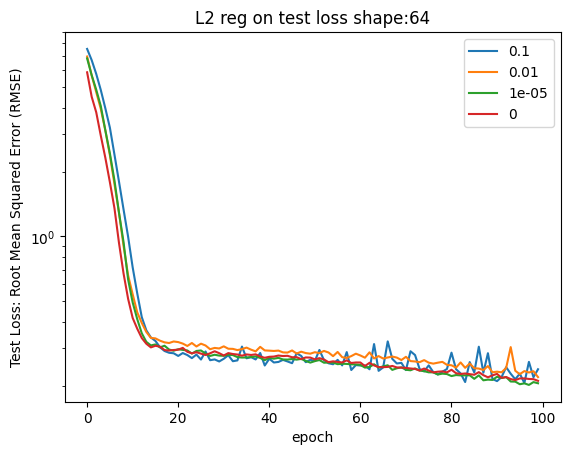

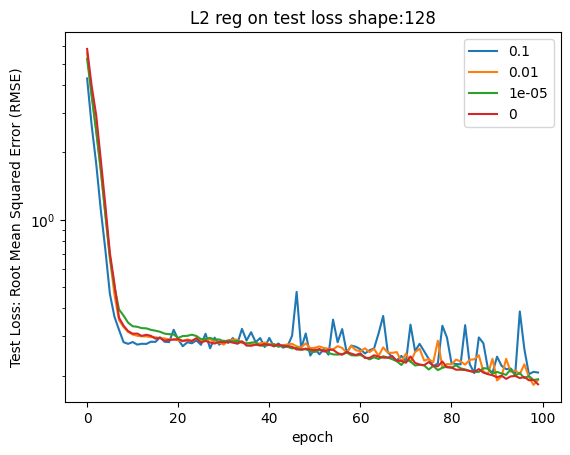

In [69]:
widths = [64,128]#,1024, 2048, 4096]
#widths = [[4,8],[2,4]]
decays = [0.1, 1e-2, 1e-5,0]
for width in widths:
    plt.figure()
    for decay in decays:
        model = SimpleNN(in_dim = in_dim, hidden = width)
        loss = model.fit(dataloader = dataloader,dataloader_test = dataloader_test, epochs=100, lr=1e-3, decay= decay)
        plt.plot(loss, label = f"{decay}")
    plt.title(f"L2 reg on test loss shape:{width}")
    plt.yscale('log')
    plt.ylabel("Test Loss: Root Mean Squared Error (RMSE)")
    plt.xlabel("epoch")
    plt.legend()
    plt.show(block=False)
plt.show()